In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "base_final_emisiones_and_deciles_chile.xlsx" # Nombre del archivo
data = pd.read_excel(path)

In [ ]:
def filtrar_df(data, condicion):
    """
    Filtra un DataFrame según una condición dada y realiza cálculos adicionales.
    
    Args:
        data (pd.DataFrame): El DataFrame a procesar.
        condicion (str): La condición a aplicar como cadena. Por ejemplo, "merged_df['dummy_issue'] == 0".
    
    Returns:
        pd.DataFrame: El DataFrame con el resultado de los cálculos.
    """
    # Crear columna 'dummy_issue' basada en la condición de 'issue_count'
    data['dummy_issue'] = np.where(data['issue_count'] > 0, 1, 0)
    
    # Extraer el año de 'Period_End_Date'
    data['Año'] = pd.to_datetime(data['Period_End_Date']).dt.year
    
    # Función para categorizar el periodo basado en el año
    def categorize_period(year):
        if 2013 <= year <= 2016:
            return '2013-2016'
        elif 2017 <= year <= 2019:
            return '2017-2019'
        elif 2020 <= year <= 2023:
            return '2020-2023'
        else:
            return 'Fuera de rango'
    
    # Crear la columna 'Period' categorizada
    data['Period'] = data['Año'].apply(categorize_period)
# Filtrar los sector 'Educational Services'
    data = data[data['NAICS_Sector_Name'] != 'Educational Services']
    data = data[data['NAICS_Sector_Name'] != 'Finance and Insurance']
    data = data[data['NAICS_Sector_Name'] != 'Transportation and Warehousing']
    
    # Agrupar por Sector y Año para calcular la mediana de ROA
    grouped = data.groupby(['NAICS_Sector_Name', 'Año']).agg(
        median_roa=('ROA', 'median')
    ).reset_index()
    
    # Agregar el periodo al DataFrame agrupado
    grouped['Period'] = grouped['Año'].apply(categorize_period)
    
    # Agrupar por Sector y Periodo para calcular el promedio de las medianas
    benchmark = grouped.groupby(['NAICS_Sector_Name', 'Period']).agg(
        avg_median_roa=('median_roa', 'mean')
    ).reset_index()
    
    # Merge del DataFrame original con el benchmark
    merged_df = pd.merge(data, benchmark, on=['NAICS_Sector_Name', 'Period'], how='inner')
    
    # Calcular las utilidades típicas y el excedente de la firma
    merged_df['tipical_profits'] = merged_df['Total_Assets,_Reported'] * merged_df['avg_median_roa']
    merged_df['firm_surplus'] = merged_df['Net_Income_Before_Taxes'] - merged_df['tipical_profits']
    
    # Filtrar el DataFrame usando la condición proporcionada
    merged_df = merged_df.loc[eval(condicion)]
    
    # Agrupar por Periodo para calcular el numerador y denominador del excedente
    surplus = merged_df.groupby(['Period']).agg(
        numerador=('firm_surplus', 'sum'),
        denominador=('Net_Income_Before_Taxes', 'sum')
    ).reset_index()
    
    # Calcular el resultado como porcentaje
    surplus['result'] = surplus['numerador'] / surplus['denominador'] * 100
    
    # Retornar el resultado
    return surplus

In [ ]:
surplus1 =filtrar_df(data, "merged_df['dummy_issue'] ==0")
surplus2 =filtrar_df(data, "merged_df['dummy_issue'] ==1")
periods = surplus1['Period']
results1 =  surplus1['result']
results2 =  surplus2['result']


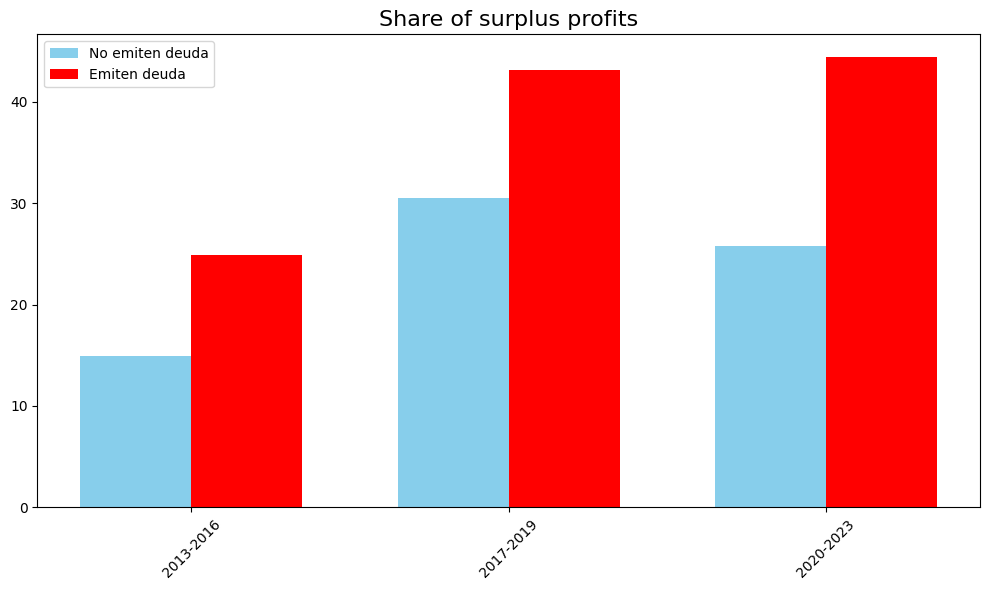

In [5]:
# Crear un nuevo índice para las barras agrupadas
x = np.arange(len(periods))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, results1, width, label='No emiten deuda', color='skyblue')
plt.bar(x + width/2, results2, width, label='Emiten deuda', color='red')

plt.title('Share of surplus profits', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks(x, periods, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
surplus1 =filtrar_df(data, "(merged_df['decil'] >=1)&(merged_df['decil'] <=9)")
surplus2 =filtrar_df(data, "merged_df['decil']==10")
periods = surplus1['Period']
results1 =  surplus1['result']
results2 =  surplus2['result']

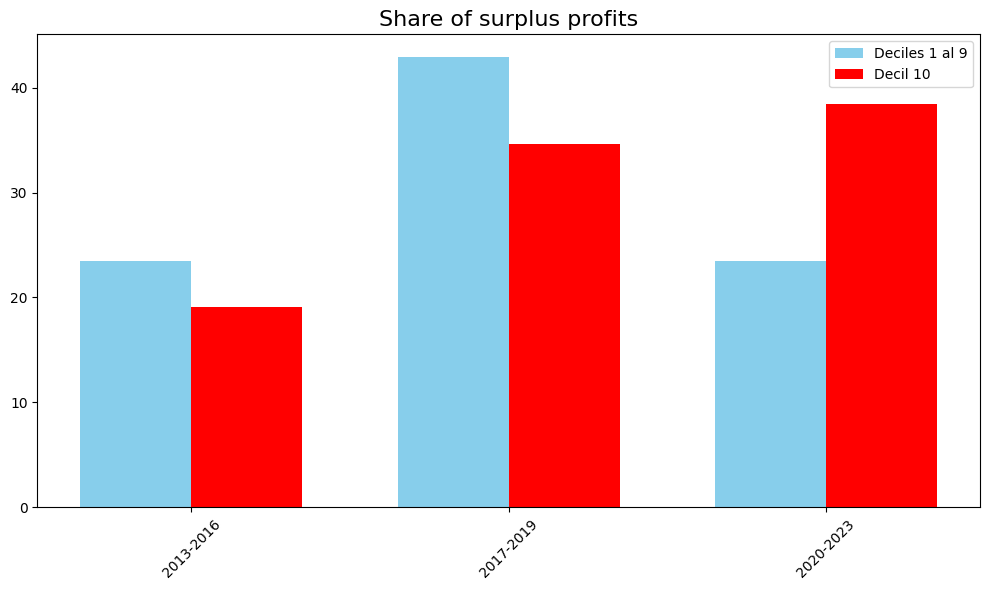

In [7]:
# Crear un nuevo índice para las barras agrupadas
x = np.arange(len(periods))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, results1, width, label='Deciles 1 al 9', color='skyblue')
plt.bar(x + width/2, results2, width, label='Decil 10', color='red')

plt.title('Share of surplus profits', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks(x, periods, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Obtener valores únicos de la columna 'frutas'
valores_distintos = data['NAICS_Sector_Name'].unique()

# Imprimir los valores distintos
print(valores_distintos)



['Retail Trade' 'Utilities' 'Finance and Insurance'
 'Mining, Quarrying, and Oil and Gas Extraction'
 'Professional, Scientific, and Technical Services' 'Manufacturing'
 'Information' 'Arts, Entertainment, and Recreation' 'Wholesale Trade'
 'Transportation and Warehousing'
 'Agriculture, Forestry, Fishing and Hunting'
 'Real Estate and Rental and Leasing' 'Construction'
 'Health Care and Social Assistance' 'Educational Services'
 'Accommodation and Food Services'
 'Other Services (except Public Administration)'
 'Administrative and Support and Waste Management and Remediation Services']


In [15]:
surplus1 =filtrar_df(data,"merged_df['NAICS_Sector_Name'] == 'Retail Trade'")
surplus2 =filtrar_df(data,"merged_df['NAICS_Sector_Name'] == 'Utilities'")
periods = surplus1['Period']
results1 =  surplus1['result']
results2 =  surplus2['result']

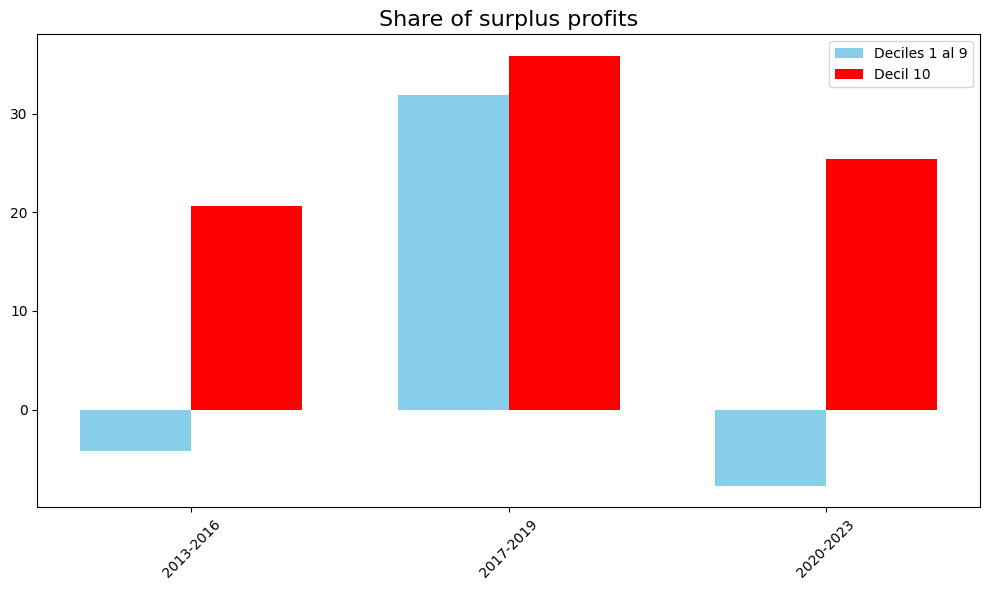

In [16]:
# Crear un nuevo índice para las barras agrupadas
x = np.arange(len(periods))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, results1, width, label='Deciles 1 al 9', color='skyblue')
plt.bar(x + width/2, results2, width, label='Decil 10', color='red')

plt.title('Share of surplus profits', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks(x, periods, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()